# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## Import Crypto-currency prices data

In [2]:
# Import Crypto-currency
TETHER_DF = pd.read_csv(r"C:\Users\ONnodum\Downloads\Tether USDt_13_02_2015-12_04_2015_historical_data_coinmarketcap.csv")
BITCOIN_DF = pd.read_csv(r"C:\Users\ONnodum\Downloads\Bitcoin_30_06_2012-29_08_2012_historical_data_coinmarketcap.csv")

### Process the Crypto-currency prices data

In [3]:
#SEPARATE THE DATASET INTO ROWS and COLUMNS
TETHER_DF = TETHER_DF["timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp"].str.split(';').apply(pd.Series,1)
BITCOIN_DF = BITCOIN_DF["timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp"].str.split(';').apply(pd.Series,1)

#ASSIGN COLUMN NAMES TO DATASET
COL_NAMES = ['timeOpen', 'timeClose','timeHigh', 'timeLow', 'open', 'high', 'low','close', 'volume', 'marketCap','timestamp']
TETHER_DF.columns = COL_NAMES
BITCOIN_DF.columns = COL_NAMES

C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\4268838424.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  TETHER_DF = TETHER_DF["timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp"].str.split(';').apply(pd.Series,1)
C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\4268838424.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  BITCOIN_DF = BITCOIN_DF["timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp"].str.split(';').apply(pd.Series,1)


#### Clean Date-Time columns

In [4]:
#REMOVE Apostrophes
TETHER_DF['timeClose'] = TETHER_DF['timeClose'].str.replace('"', ' ')
BITCOIN_DF['timeClose'] = BITCOIN_DF['timeClose'].str.replace('"', ' ')

#Remove whitespace
BITCOIN_DF['timeClose'] = BITCOIN_DF['timeClose'].str.strip()
TETHER_DF['timeClose'] = TETHER_DF['timeClose'].str.strip()

#CONVERT TO YEAR/MONTH/DAY FORMAT
BITCOIN_DF['timeClose'] = pd.to_datetime(BITCOIN_DF['timeClose']).dt.strftime("%Y/%m/%d")
TETHER_DF['timeClose'] = pd.to_datetime(TETHER_DF['timeClose']).dt.strftime("%Y/%m/%d")

#Convert Price columns to Integer
BITCOIN_DF['close'] = BITCOIN_DF['close'].astype(float)
TETHER_DF['close'] = TETHER_DF['close'].astype(float)

#MATCH THE BEGINNING AND END DATES IN EACH DATASET 
start_date = max(np.min(BITCOIN_DF['timeClose'].values), np.min(TETHER_DF['timeClose'].values))

# Find the common ending date
end_date = min(np.max(BITCOIN_DF['timeClose'].values), np.max(TETHER_DF['timeClose'].values))

#FILTER DATASETS SO BOTH HAVE THE SAME STARTING AND END DATES
BITCOIN_DF = BITCOIN_DF[(BITCOIN_DF['timeClose'] >= start_date) & (BITCOIN_DF['timeClose'] <= end_date)]
TETHER_DF = TETHER_DF[(TETHER_DF['timeClose'] >= start_date) & (TETHER_DF['timeClose'] <= end_date)]

# Import  data from Scamsmart Warning List

In [5]:
SCAMSMART_DF = pd.read_excel(r"C:\Users\ONnodum\Downloads\Warning list data-2023-10-10-16-23-06.xlsx")

In [6]:
#RENAME COLUMNS
SCAMSMART_DF = SCAMSMART_DF.rename(columns={"Unnamed: 1": "CompanyName", "Unnamed: 7": "Website", "Unnamed: 4" : "Created Date" })
SCAMSMART_DF = SCAMSMART_DF[["Website", "Created Date"]]
SCAMSMART_DF = SCAMSMART_DF.dropna(subset = ["Website"])

#REMOVE HEADER ROW
SCAMSMART_DF = SCAMSMART_DF.drop(8)

#FORMAT DATE/TIME COLUMN
SCAMSMART_DF["Created Date"] = pd.to_datetime(SCAMSMART_DF["Created Date"], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')

#PROCESSING DATASET TO MATCH LIST OF CRYPTO KEYWORDS
SCAMSMART_DF['Website'] = SCAMSMART_DF['Website'].str.upper()

## Import Spanish Reg data

In [7]:
SPANISH_REG = pd.read_csv(r"C:\Users\ONnodum\Downloads\REGULATOR_WEBSITES.csv")
SPANISH_REG = SPANISH_REG[["Date", "URL"]]
SPANISH_REG = SPANISH_REG.rename(columns={"URL": "Website", "Date":"Created Date"})
SPANISH_REG['Created Date'] = pd.to_datetime(SPANISH_REG['Created Date'])

In [8]:
SPANISH_REG["Created Date"] = SPANISH_REG["Created Date"].dt.strftime("%Y/%m/%d")


In [9]:
SPANISH_REG

,Created Date,Website
0,2023/10/30,HTTPS://INVOX.TRADE
1,2023/10/30,HTTPS://GECRUXINVEST.IO/
2,2023/10/30,HTTPS://ALGOTRUST.TRADE/
3,2023/10/30,HTTPS://ALFATRADERS.PRO/
4,2023/10/30,WWW.TANGENT-CAPITAL.PRO
...,...,...
7326,2015/03/16,WWW.ECONOMISTS-LAWYERS.COM
7327,2015/02/23,WWW.KD-MARKETS.COM
7328,2015/01/26,WWW.SIMPLETRADELIMITED.COM
7329,2015/01/26,WWW.FXGLCAPITAL.COM


## Import Problem Firms data on Scam Websites

In [10]:
#Import Website data
WEBSITE_DATA1 = pd.read_excel(r"C:\Users\ONnodum\Downloads\Website Takedowns Tracker.xlsx", sheet_name='Active Scams on Unreg List')
WEBSITE_DATA2 = pd.read_excel(r"C:\Users\ONnodum\Downloads\Website Takedowns Tracker.xlsx", sheet_name='Addresses - Closed')

WEBSITE_DATA1 = WEBSITE_DATA1[["Website", "Date added to list"]]
WEBSITE_DATA2 = WEBSITE_DATA2[['Website', "Creation date"]]

#RENAME BOTH COLUMNS FOR CONCAT
WEBSITE_DATA1 = WEBSITE_DATA1.rename(columns = {"Date added to list" : "Created Date"})
WEBSITE_DATA2 = WEBSITE_DATA2.rename(columns = {"Creation date" : "Created Date"})
#Convert the Series to a DataFrame with 'Website' as the column name
PROBLEM_FIRM_DATA = pd.concat([WEBSITE_DATA1,WEBSITE_DATA2], ignore_index=True)

In [11]:
#PROCESS TIME COLUMNS
PROBLEM_FIRM_DATA["Created Date"] = pd.to_datetime(PROBLEM_FIRM_DATA["Created Date"], errors='coerce')
PROBLEM_FIRM_DATA = PROBLEM_FIRM_DATA.dropna(subset=['Created Date'])
PROBLEM_FIRM_DATA["Created Date"] = pd.to_datetime(PROBLEM_FIRM_DATA["Created Date"])
PROBLEM_FIRM_DATA["Created Date"] = PROBLEM_FIRM_DATA["Created Date"].dt.strftime("%Y/%m/%d")


### IMPORT DATALAKE DATA

In [12]:
DATALAKE_DF = pd.read_csv(r"C:\Users\ONnodum\Downloads\query-impala-55570.csv")


In [13]:
#RENAME TIMECOLUMNS TO MATCH OTHER DATASETS
DATALAKE_DF= DATALAKE_DF.rename(columns = {"extraction_date" : "Created Date"})
DATALAKE_DF= DATALAKE_DF.rename(columns = {"domain_names" : "Website"})
#PROCESS TIME COLUMNS
DATALAKE_DF["Created Date"] = pd.to_datetime(DATALAKE_DF["Created Date"], errors='coerce')
DATALAKE_DF["Created Date"] = pd.to_datetime(DATALAKE_DF["Created Date"])
DATALAKE_DF["Created Date"] = DATALAKE_DF["Created Date"].dt.strftime("%Y/%m/%d")

# IMPORT BITCOIN SENTIMENT DATA

In [14]:
SENTIMENT_DF = pd.read_csv(r"C:\Users\ONnodum\Downloads\BITCOIN SENTIMENT.csv")
SENTIMENT_DF.rename(columns = {"date" : "Timecolumn"}, inplace=True)


In [15]:
#CONVERT TO PANDAS TIMEFRAME
SENTIMENT_DF["Timecolumn"] = pd.to_datetime(SENTIMENT_DF["Timecolumn"]).dt.strftime('%Y/%m/%d')


## CONCAT WEBSITE DATA

In [16]:
WEBSITE_CONCAT = pd.concat([SPANISH_REG, SCAMSMART_DF, PROBLEM_FIRM_DATA, DATALAKE_DF], ignore_index = True)
WEBSITE_CONCAT = WEBSITE_CONCAT.dropna(subset = ["Website"])

#FILTER TO CRYPTO WEBSITES
crypto_keywords = [
    'bitcoin', 'btc', 'ethereum', 'eth', 'litecoin', 'ltc', 'ripple', 'xrp',
    'blockchain', 'cryptocurrency', 'crypto', 'digital currency', 'virtual currency',
    'altcoin', 'token', 'smart contract', 'decentralized', 'mining', 'ICO', 'initial coin offering',
    'NFT', 'non-fungible token', 'wallet', 'dapp', 'decentralized application',
    'hashrate', 'hash function', 'proof of work', 'proof of stake', 'satoshi', 'peer-to-peer',
    'consensus algorithm', 'fork', 'hard fork', 'soft fork', 'public ledger', 'private key',
    'public key', 'crypto exchange', 'cryptographic', 'crypto mining', 'smart wallet', 'crypto market',
 'block reward', 'cryptocoin', 'tokenomics', 'staking', 'whale', 'DYOR', 'HODL', 'FOMO', 'FUD']


#FILTERING THE DATASET TO CRYPTO KEYWORDS
WEBSITE_CONCAT = WEBSITE_CONCAT[WEBSITE_CONCAT['Website'].str.contains("|".join(crypto_keywords), case = False, regex = True)]
WEBSITE_CONCAT['Website'] = WEBSITE_CONCAT['Website'].str.upper()


In [17]:
#DROP DUPLICATES
WEBSITE_CONCAT = WEBSITE_CONCAT.reset_index(drop=True)
WEBSITE_CONCAT = WEBSITE_CONCAT.drop_duplicates(subset='Website', keep='first')
WEBSITE_CONCAT

,Created Date,Website
0,2023/10/25,HTTPS://ACCOUNT.CRYPTONOID.CO
1,2023/10/25,WWW.ALPHASCRYPTO.COM
2,2023/10/25,HTTPS://CRYPTONOID.CO
3,2023/10/25,WWW.CRYPTO-WAVE-FINANCE.LTD
4,2023/10/25,HTTPS://BTCSYSTEM.NET
...,...,...
32837,2023/11/28,CRYPTOPTIONS.ONLINE
32838,2023/11/28,BLOCKCHAINING.SITE
32839,2023/11/28,ROCKETCRYPTO.INFO
32840,2023/11/28,CRYPTOBILLEE.COM


#### MERGE BITCOIN, TETHER AND WEBSITE

In [18]:
BITCOIN_DF.rename(columns = {'timeClose': 'Timecolumn'}, inplace= True)
TETHER_DF.rename(columns = {'timeClose': 'Timecolumn'}, inplace= True)
WEBSITE_CONCAT.rename(columns = {'Created Date': 'Timecolumn'}, inplace= True)

In [19]:
#MERGE
MERGE = pd.merge(BITCOIN_DF, TETHER_DF, on= 'Timecolumn', how = 'inner')
MERGE = pd.merge(MERGE, WEBSITE_CONCAT, on =  'Timecolumn', how = 'inner' )

In [20]:
#DROP OTHER TIME COLUMNS
MERGE.rename(columns = {"open_x": "Open_Bitcoin", "high_x": "high_Bitcoin", "low_x": "low_Bitcoin", 'close_x': 'BITCOIN PRICE', "volume_x" : "volume_bitcoin", "marketCap_x" : "market_Bitcoin", "open_y": "Open_Tether", "high_y": "high_Tether", "low_y": "low_Tether", 'close_y': 'TETHER PRICE', "volume_y" : "volume_tether", "marketCap_y" : "market_Tether"}, inplace = True)

#DROPPING COLUMNS WITH LOW CORRELATION
MERGE = MERGE.drop(['timeOpen_x', 'timeHigh_x', 'timeHigh_x', 'timeLow_y', 'timestamp_y', 'timestamp_x', 'timeHigh_y'], axis=1)
MERGE

,Timecolumn,timeLow_x,Open_Bitcoin,high_Bitcoin,low_Bitcoin,BITCOIN PRICE,volume_bitcoin,market_Bitcoin,timeOpen_y,Open_Tether,high_Tether,low_Tether,TETHER PRICE,volume_tether,market_Tether,Website
0,2023/10/02,"""2023-10-02T21:55:00.000Z""",27976.7991520291,28494.4596384314,27347.7875796333,27530.784890,19793041321.84,536912579985.45,2023-10-02T00:00:00.000Z,1.0000273171,1.0010062193,0.9998018965,1.000333,33775951107.32,83284732156.02,HTTPS://DELTASCRYPTO.COM/
1,2023/10/02,"""2023-10-02T21:55:00.000Z""",27976.7991520291,28494.4596384314,27347.7875796333,27530.784890,19793041321.84,536912579985.45,2023-10-02T00:00:00.000Z,1.0000273171,1.0010062193,0.9998018965,1.000333,33775951107.32,83284732156.02,HTTPS://CRYPTO-GLOBAL.ORG
2,2023/10/02,"""2023-10-02T21:55:00.000Z""",27976.7991520291,28494.4596384314,27347.7875796333,27530.784890,19793041321.84,536912579985.45,2023-10-02T00:00:00.000Z,1.0000273171,1.0010062193,0.9998018965,1.000333,33775951107.32,83284732156.02,HTTPS://ALPHAMININGPOOL.COM
3,2023/10/02,"""2023-10-02T21:55:00.000Z""",27976.7991520291,28494.4596384314,27347.7875796333,27530.784890,19793041321.84,536912579985.45,2023-10-02T00:00:00.000Z,1.0000273171,1.0010062193,0.9998018965,1.000333,33775951107.32,83284732156.02,HTTPS://POWERFULEXPERTCRYPTOZONE.COM
4,2023/10/02,"""2023-10-02T21:55:00.000Z""",27976.7991520291,28494.4596384314,27347.7875796333,27530.784890,19793041321.84,536912579985.45,2023-10-02T00:00:00.000Z,1.0000273171,1.0010062193,0.9998018965,1.000333,33775951107.32,83284732156.02,CRYPTOUS.CLUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23541,2015/03/21,"""2015-03-21T06:34:21.000Z""",261.6440124512,262.1960144043,255.6499938965,260.024994,17130100,3631424641.87,2015-03-21T00:00:00.000Z,1,1,1,1.000000,206.27,251600,WWW.VIRIDIANETHICALINVESTMENTS.COM
23542,2015/03/21,"""2015-03-21T06:34:21.000Z""",261.6440124512,262.1960144043,255.6499938965,260.024994,17130100,3631424641.87,2015-03-21T00:00:00.000Z,1,1,1,1.000000,206.27,251600,WWW.NORTHATLANTICOIL.COM
23543,2015/03/21,"""2015-03-21T06:34:21.000Z""",261.6440124512,262.1960144043,255.6499938965,260.024994,17130100,3631424641.87,2015-03-21T00:00:00.000Z,1,1,1,1.000000,206.27,251600,WWW.SETHCOHEN.US
23544,2015/03/21,"""2015-03-21T06:34:21.000Z""",261.6440124512,262.1960144043,255.6499938965,260.024994,17130100,3631424641.87,2015-03-21T00:00:00.000Z,1,1,1,1.000000,206.27,251600,WWW.UNICORNFINANCEGROUP.COM


In [21]:
MERGE.isna().any()

Timecolumn        False
timeLow_x         False
Open_Bitcoin      False
high_Bitcoin      False
low_Bitcoin       False
BITCOIN PRICE     False
volume_bitcoin    False
market_Bitcoin    False
timeOpen_y        False
Open_Tether       False
high_Tether       False
low_Tether        False
TETHER PRICE      False
volume_tether     False
market_Tether     False
Website           False
dtype: bool

In [22]:
#CONVERT COLUMNS TO NUMERIC
columns_to_convert = ['Open_Bitcoin', 'high_Bitcoin', 'low_Bitcoin', 'volume_bitcoin','market_Bitcoin', 'Open_Tether', 'high_Tether', 'low_Tether', 'volume_tether', 'market_Tether' ]
MERGE[columns_to_convert] = MERGE[columns_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
#CREATE NEW COLUMN WITH WEBSITE COUNT
MERGE['website_count'] = MERGE.groupby(['Timecolumn', 'Website'])['Website'].transform('count')




In [23]:
MERGE[['Timecolumn', 'Website', 'website_count','high_Bitcoin']]

,Timecolumn,Website,website_count,high_Bitcoin
0,2023/10/02,HTTPS://DELTASCRYPTO.COM/,1,28494.459638
1,2023/10/02,HTTPS://CRYPTO-GLOBAL.ORG,1,28494.459638
2,2023/10/02,HTTPS://ALPHAMININGPOOL.COM,1,28494.459638
3,2023/10/02,HTTPS://POWERFULEXPERTCRYPTOZONE.COM,1,28494.459638
4,2023/10/02,CRYPTOUS.CLUB,1,28494.459638
...,...,...,...,...
23541,2015/03/21,WWW.VIRIDIANETHICALINVESTMENTS.COM,1,262.196014
23542,2015/03/21,WWW.NORTHATLANTICOIL.COM,1,262.196014
23543,2015/03/21,WWW.SETHCOHEN.US,1,262.196014
23544,2015/03/21,WWW.UNICORNFINANCEGROUP.COM,1,262.196014


In [24]:
#GROUPING THE DATASETS BY DATES
MERGE = MERGE.groupby('Timecolumn').agg({
    'website_count': 'sum',
    'BITCOIN PRICE': 'mean',  # Assuming you want the mean Bitcoin price for each date
    'TETHER PRICE': 'mean',
    'Open_Bitcoin': 'mean',
    'high_Bitcoin' : 'mean',
    'low_Bitcoin' : 'mean',
    'volume_bitcoin' : 'mean',
    'market_Bitcoin' : 'mean',
    'Open_Tether' : 'mean',
    'high_Tether' : 'mean',
    'low_Tether' : 'mean',
    'volume_tether' : 'mean',
    'market_Tether' : 'mean',
    # Assuming you want the mean Tether price for each date
}).reset_index()

In [25]:
MERGE

,Timecolumn,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether
0,2015/03/21,8,260.024994,1.000000,261.644012,262.196014,255.649994,1.713010e+07,3.631425e+09,1.000000,1.000000,1.000000,2.062700e+02,2.516000e+05
1,2016/09/09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06
2,2018/03/01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09
3,2018/03/02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09
4,2018/05/23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2023/09/28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10
486,2023/09/29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10
487,2023/09/30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10
488,2023/10/01,133,27983.750382,0.999894,26967.397433,28047.237710,26965.094292,9.503917e+09,5.457193e+11,1.000193,1.000616,0.999770,2.688783e+10,8.324624e+10


# Linear Regression

### Correlational Analysis

In [26]:
CORRELATION_ANALYSIS  = MERGE[['Open_Bitcoin', 'high_Bitcoin', 'low_Bitcoin', 'volume_bitcoin','market_Bitcoin', 'Open_Tether', 'high_Tether', 'low_Tether', 'volume_tether', 'market_Tether', 'website_count', 'BITCOIN PRICE', 'TETHER PRICE' ]].corr()
CORRELATION_ANALYSIS

,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,website_count,BITCOIN PRICE,TETHER PRICE
Open_Bitcoin,1.000000,0.998489,0.997308,0.301586,0.995069,-0.232461,-0.422077,0.284297,0.543881,0.583077,-0.007268,0.995701,-0.142798
high_Bitcoin,0.998489,1.000000,0.997109,0.318341,0.996926,-0.227117,-0.417420,0.279607,0.556720,0.573002,-0.019587,0.998040,-0.139074
low_Bitcoin,0.997308,0.997109,1.000000,0.270653,0.998128,-0.233226,-0.426717,0.293093,0.511291,0.592497,0.008329,0.998141,-0.142365
volume_bitcoin,0.301586,0.318341,0.270653,1.000000,0.277668,0.032954,0.023436,-0.143998,0.909060,-0.170383,-0.535262,0.296162,-0.016192
market_Bitcoin,0.995069,0.996926,0.998128,0.277668,1.000000,-0.237543,-0.436229,0.293776,0.516808,0.607007,0.020064,0.999382,-0.146108
Open_Tether,-0.232461,-0.227117,-0.233226,0.032954,-0.237543,1.000000,0.648068,0.114947,-0.042599,-0.418283,-0.157508,-0.228194,0.659482
high_Tether,-0.422077,-0.417420,-0.426717,0.023436,-0.436229,0.648068,1.000000,-0.351057,-0.098866,-0.678203,-0.220959,-0.421625,0.402972
low_Tether,0.284297,0.279607,0.293093,-0.143998,0.293776,0.114947,-0.351057,1.000000,-0.054407,0.381306,0.138693,0.285644,0.244749
volume_tether,0.543881,0.556720,0.511291,0.909060,0.516808,-0.042599,-0.098866,-0.054407,1.000000,0.005198,-0.489955,0.534028,-0.055433
market_Tether,0.583077,0.573002,0.592497,-0.170383,0.607007,-0.418283,-0.678203,0.381306,0.005198,1.000000,0.471047,0.581190,-0.290100


### Visualisation

<Axes: xlabel='website_count', ylabel='BITCOIN PRICE'>

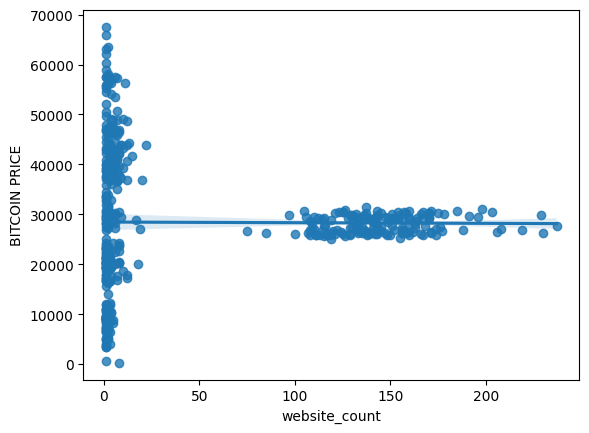

In [27]:
sns.regplot(data=MERGE, x="website_count", y="BITCOIN PRICE")

In [28]:
MERGE[(MERGE['BITCOIN PRICE'] > 25000) & (MERGE['BITCOIN PRICE'] < 30000)].head(50)


,Timecolumn,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether
222,2022/05/11,17,28936.355031,0.995872,31016.182752,32013.401493,28170.413086,7.038886e+10,5.508701e+11,0.999790,0.999996,0.993459,1.597004e+11,8.280447e+10
223,2022/05/12,3,29047.751004,0.997609,28936.733926,30032.438948,26350.490174,6.698917e+10,5.530172e+11,0.995879,0.997736,0.948486,1.410528e+11,8.097555e+10
224,2022/05/13,4,29283.103812,0.998239,29030.910391,30924.802718,28782.329658,4.284112e+10,5.575250e+11,0.997527,0.999193,0.996945,8.700989e+10,7.862868e+10
225,2022/05/16,1,29862.918241,0.998779,31304.374144,31305.342599,29251.885558,3.261390e+10,5.686433e+11,0.999084,0.999153,0.998659,6.250449e+10,7.565960e+10
227,2022/05/18,5,28720.271400,0.998802,30424.479223,30618.715981,28720.271400,3.128527e+10,5.469364e+11,0.998902,0.999150,0.998542,5.606725e+10,7.412012e+10
229,2022/05/20,1,29200.740088,0.998818,30311.119346,30664.976367,28793.606034,3.074938e+10,5.561319e+11,0.998956,0.999370,0.998700,5.496096e+10,7.411322e+10
230,2022/05/21,1,29432.225963,0.998793,29199.859007,29588.868815,29027.393818,1.727484e+10,5.605658e+11,0.998894,0.999038,0.998599,3.492424e+10,7.318668e+10
231,2022/05/23,1,29098.909746,0.999088,30309.396480,30590.586484,28975.559609,3.148345e+10,5.542688e+11,0.999065,0.999294,0.998829,5.858561e+10,7.320826e+10
232,2022/05/24,1,29655.586133,0.999107,29101.125294,29774.354720,28786.589452,2.661651e+10,5.648952e+11,0.999048,0.999204,0.998847,5.105342e+10,7.320965e+10
233,2022/05/25,9,29562.361266,0.998976,29653.135294,30157.784535,29384.949349,2.752506e+10,5.631452e+11,0.999093,0.999185,0.998817,5.031184e+10,7.320005e+10


<Axes: xlabel='website_count', ylabel='TETHER PRICE'>

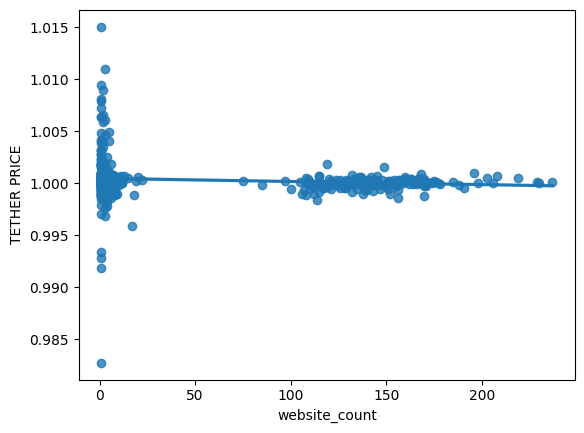

In [29]:
sns.regplot(data=MERGE, x="website_count", y="TETHER PRICE")

### Predictive model

In [30]:
#COPY DATESET BEFORE GROUPING
MERGE1 = MERGE.copy()

In [31]:
MERGE['Timecolumn'] = pd.to_datetime(MERGE['Timecolumn'])
MERGE.set_index('Timecolumn', inplace=True)




In [32]:
MERGE.isna().sum()

website_count     0
BITCOIN PRICE     0
TETHER PRICE      0
Open_Bitcoin      0
high_Bitcoin      0
low_Bitcoin       0
volume_bitcoin    0
market_Bitcoin    0
Open_Tether       0
high_Tether       0
low_Tether        0
volume_tether     0
market_Tether     0
dtype: int64

In [33]:
MERGE = MERGE.dropna()

#### LINEAR REGRESSION MODEL 1

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming MERGE is your DataFrame containing 'BITCOIN PRICE' and 'website_count'

# Extract the features and target variable
X = MERGE["BITCOIN PRICE"].values.reshape(-1, 1)  # Reshape to 2D array
y = MERGE['website_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4961.759126361511
R-squared: -0.014868867219521853


#### LINEAR REGRESSION MODEL 2

In [35]:
MERGE['BITCOIN_CLOSE_PRICE_DIFF'] =  MERGE['BITCOIN PRICE'].diff()
MERGE['TETHER PRICE DIFF'] =  MERGE['TETHER PRICE'].diff()

In [36]:
MERGE = MERGE.dropna()
MERGE

,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF
Timecolumn,,,,,,,,,,,,,,,
2016-09-09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06,362.836029,0.000000
2018-03-01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09,10328.138977,0.000420
2018-03-02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09,135.400391,-0.000690
2018-05-23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09,-3528.580566,0.004290
2018-06-20,1,6776.549805,0.998829,6770.759766,6821.560059,6611.879883,3.888640e+09,1.159164e+11,1.001710,1.010210,0.994434,2.215260e+09,2.604087e+09,-781.270020,-0.005191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10,668.829146,0.000631
2023-09-29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10,-109.825162,0.000025
2023-09-30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10,56.194698,0.000168


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming MERGE is your DataFrame containing the specified columns
features = ['volume_bitcoin',
            'market_Bitcoin', 'Open_Tether', 'high_Tether', 'low_Tether',
            'volume_tether', 'market_Tether', 'BITCOIN PRICE', 'TETHER PRICE']

# Extract the features and target variable
X = MERGE[features]
y = MERGE['website_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1552.0304242511854
R-squared: 0.6820332789426086


#### OUTLIERS REMOVED LINEAR REGRESSION MODEL

In [38]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'Merge'
# Calculate the Z-scores for each column
z_scores = stats.zscore(MERGE['website_count'])

# Set a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (abs(z_scores) < threshold)

# Apply the mask to your DataFrame
Merge_no_outliers = MERGE[outliers_mask]
Merge_no_outliers = Merge_no_outliers.reset_index()
Merge_no_outliers

,Timecolumn,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF
0,2016-09-09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06,362.836029,0.000000
1,2018-03-01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09,10328.138977,0.000420
2,2018-03-02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09,135.400391,-0.000690
3,2018-05-23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09,-3528.580566,0.004290
4,2018-06-20,1,6776.549805,0.998829,6770.759766,6821.560059,6611.879883,3.888640e+09,1.159164e+11,1.001710,1.010210,0.994434,2.215260e+09,2.604087e+09,-781.270020,-0.005191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2023-09-28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10,668.829146,0.000631
485,2023-09-29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10,-109.825162,0.000025
486,2023-09-30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10,56.194698,0.000168
487,2023-10-01,133,27983.750382,0.999894,26967.397433,28047.237710,26965.094292,9.503917e+09,5.457193e+11,1.000193,1.000616,0.999770,2.688783e+10,8.324624e+10,1015.834081,-0.000316


In [39]:
Merge_no_outliers['BITCOIN_CLOSE_PRICE_DIFF'] =  Merge_no_outliers['BITCOIN PRICE'].diff()
Merge_no_outliers['TETHER PRICE DIFF'] =  Merge_no_outliers['TETHER PRICE'].diff()

In [40]:
Merge_no_outliers = Merge_no_outliers.dropna()

In [41]:
from sklearn.preprocessing import StandardScaler
features = ['volume_bitcoin',
            'market_Bitcoin', 'Open_Tether', 'high_Tether', 'low_Tether',
            'volume_tether', 'market_Tether', 'BITCOIN PRICE', 'TETHER PRICE', 'TETHER PRICE DIFF']

# Extract the features and target variable
X = Merge_no_outliers[features]
y = Merge_no_outliers['website_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("MAE:",(mean_absolute_error(y_test, predictions)))

Mean Squared Error: 1251.9052870534972
R-squared: 0.7188711952741234
MAE: 26.576611393934627


In [42]:
PREDICTION_COMPARISON = pd.DataFrame({"Actual Webcount":y_test, "Predicted":predictions})
PREDICTION_COMPARISON.head(50)

,Actual Webcount,Predicted
73,3,-0.001166
245,2,17.598241
438,143,143.285006
80,7,-27.038383
403,170,139.168230
480,158,128.163505
200,5,53.406468
64,3,5.741793
85,1,-54.895336
308,8,72.586236


#### LINEAR REGRESSION MODEL INTRA DAY VOLATILITY

In [43]:
MERGE

,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF
Timecolumn,,,,,,,,,,,,,,,
2016-09-09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06,362.836029,0.000000
2018-03-01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09,10328.138977,0.000420
2018-03-02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09,135.400391,-0.000690
2018-05-23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09,-3528.580566,0.004290
2018-06-20,1,6776.549805,0.998829,6770.759766,6821.560059,6611.879883,3.888640e+09,1.159164e+11,1.001710,1.010210,0.994434,2.215260e+09,2.604087e+09,-781.270020,-0.005191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10,668.829146,0.000631
2023-09-29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10,-109.825162,0.000025
2023-09-30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10,56.194698,0.000168


In [44]:
Merge_no_outliers['BITCOIN INTRA DAY VOLATILITY'] = Merge_no_outliers['high_Bitcoin'] - Merge_no_outliers['low_Bitcoin']
Merge_no_outliers['TETHER INTRA DAY VOLATILITY'] = Merge_no_outliers['high_Tether'] - Merge_no_outliers['low_Tether']

C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\1278164804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merge_no_outliers['BITCOIN INTRA DAY VOLATILITY'] = Merge_no_outliers['high_Bitcoin'] - Merge_no_outliers['low_Bitcoin']
C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\1278164804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merge_no_outliers['TETHER INTRA DAY VOLATILITY'] = Merge_no_outliers['high_Tether'] - Merge_no_outliers['low_Tether']


In [45]:
from sklearn.preprocessing import StandardScaler
features = ['volume_bitcoin',
            'market_Bitcoin', 'Open_Tether', 'high_Tether', 'low_Tether',
            'volume_tether', 'market_Tether', 'BITCOIN PRICE', 'TETHER PRICE','TETHER PRICE DIFF',  'TETHER INTRA DAY VOLATILITY', 'BITCOIN INTRA DAY VOLATILITY']

# Extract the features and target variable
X = Merge_no_outliers[features]
y = Merge_no_outliers['website_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("MAE:",(mean_absolute_error(y_test, predictions)))

Mean Squared Error: 1316.0763844706514
R-squared: 0.7044608847646978
MAE: 27.28691287077302


In [46]:
PREDICTION_COMPARISON = pd.DataFrame({"Actual Webcount":y_test, "Predicted":predictions})
PREDICTION_COMPARISON.head(50)

,Actual Webcount,Predicted
73,3,1.799264
245,2,12.162116
438,143,141.240158
80,7,-25.896144
403,170,139.019297
480,158,130.965461
200,5,30.773351
64,3,4.829089
85,1,-84.814351
308,8,73.495684


#### LINEAR REGRESSION MODEL OUTLIER REMOVED (SENTIMENT ANALYSIS)

In [47]:
Merge_no_outliers['Timecolumn'] = Merge_no_outliers['Timecolumn'].astype(str).str.replace('-', '/')
Merge_no_outliers1 = pd.merge(Merge_no_outliers, SENTIMENT_DF, on = 'Timecolumn', how = 'inner')
Merge_no_outliers1

C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\1924010539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merge_no_outliers['Timecolumn'] = Merge_no_outliers['Timecolumn'].astype(str).str.replace('-', '/')


,Timecolumn,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,...,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF,BITCOIN INTRA DAY VOLATILITY,TETHER INTRA DAY VOLATILITY,cleaned_tweets,polarity,sentiment
0,2021/02/15,1,47945.056832,1.000250,48696.536660,48875.571611,46347.477092,7.706990e+10,8.932101e+11,1.000787,...,0.999694,1.626936e+11,3.209772e+10,10472.966729,-0.000763,2528.094519,0.001299,💚🤑☘🤑👉 $AMA …,0.000000,neutral
1,2021/04/07,2,56048.937813,1.001855,58186.508534,58731.142901,55604.023592,7.564530e+10,1.046793e+12,1.001607,...,1.000370,1.610057e+11,4.313596e+10,-2869.894901,0.001835,3127.119309,0.002220,@BitzippOfficial Good project 🤩🤩🤩 …,0.700000,positive
2,2021/04/19,1,55724.267098,0.999865,56191.584109,57520.054777,54368.593655,6.534487e+10,1.041288e+12,0.999953,...,0.999800,1.696469e+11,4.814000e+10,-324.670715,-0.001989,3151.461122,0.000400,$XVG will bring you the real money. 🚀🚀🚀💸💸💸Bitc...,0.200000,positive
3,2021/06/23,1,33723.028978,1.000746,32515.714303,34753.408503,31772.632355,4.631711e+10,6.320113e+11,1.000962,...,1.000390,7.845121e+10,6.274650e+10,-2139.348749,-0.000094,2980.776148,0.000752,Turtle Finance ready to fly🔥🔥🔥@TurtleFinanceCo...,0.200000,positive
4,2021/07/05,1,33746.002456,1.000667,35284.344430,35284.344430,33213.661034,2.672155e+10,6.326962e+11,0.999426,...,0.999426,4.721585e+10,6.241550e+10,-1294.834793,0.000452,2070.683396,0.001614,Why ‘Cardano is just teasing us’💡 bitcoin ...,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2022/10/11,2,19051.418269,0.999901,19138.999877,19241.960236,18925.603222,2.871153e+10,3.653408e+11,1.000009,...,0.999889,3.846822e+10,6.841512e+10,-90.065236,-0.000117,316.357014,0.000176,Want to cancel Cancel Culture? Get BitcoinSick...,0.056566,positive
71,2022/10/13,4,19382.904034,1.000079,19156.966613,19453.327971,18319.822630,4.421984e+10,3.717317e+11,0.999983,...,0.999932,6.045086e+10,6.842723e+10,331.485764,0.000177,1133.505342,0.000204,"There you have it, we are at the same prices a...",0.075000,positive
72,2022/11/07,1,20602.816725,1.000094,20924.620484,21053.246150,20489.973344,5.351085e+10,3.955964e+11,1.000101,...,1.000039,7.259861e+10,6.950319e+10,392.829310,0.000087,563.272806,0.000127,"As part of ongoing efforts, law enforcement c...",0.000000,neutral
73,2022/11/10,4,17586.771450,0.997835,15883.158227,18054.311779,15834.018093,8.320228e+10,3.377357e+11,0.998634,...,0.981525,1.148071e+11,6.834882e+10,-3016.045276,-0.002259,2220.293686,0.017450,Y’all Message me for any account recovery or ...,0.000000,neutral


In [48]:
SENTIMENT_DF

,Timecolumn,cleaned_tweets,polarity,sentiment
0,2021/02/10,Blue Ridge Bank shares halted by NYSE after bi...,0.000000,neutral
1,2021/02/09,⬇️ Seller alert: 10 $BTC sold into the bid @ 4...,0.000000,neutral
2,2021/02/08,Crypto Space Keeps Making History 💥Bitcoin b...,0.000000,neutral
3,2021/02/07,Pretty sure you're supposed to be getting it t...,0.387500,positive
4,2021/02/06,@timevalueofbtc @CandiceOnAir Fair point. Many...,0.400000,positive
...,...,...,...,...
210,2022/11/14,It is so sad to see that this industry got so ...,-0.066667,negative
211,2022/11/13,"What's depleting faster, the Bitcoin supply or...",0.000000,neutral
212,2022/11/21,Another giant of the crypto-market is on the v...,-0.122500,negative
213,2022/11/20,price update: $1143.87 USDBitcoin 0.07021941...,0.000000,neutral


In [49]:
Merge_no_outliers1

,Timecolumn,website_count,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,...,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF,BITCOIN INTRA DAY VOLATILITY,TETHER INTRA DAY VOLATILITY,cleaned_tweets,polarity,sentiment
0,2021/02/15,1,47945.056832,1.000250,48696.536660,48875.571611,46347.477092,7.706990e+10,8.932101e+11,1.000787,...,0.999694,1.626936e+11,3.209772e+10,10472.966729,-0.000763,2528.094519,0.001299,💚🤑☘🤑👉 $AMA …,0.000000,neutral
1,2021/04/07,2,56048.937813,1.001855,58186.508534,58731.142901,55604.023592,7.564530e+10,1.046793e+12,1.001607,...,1.000370,1.610057e+11,4.313596e+10,-2869.894901,0.001835,3127.119309,0.002220,@BitzippOfficial Good project 🤩🤩🤩 …,0.700000,positive
2,2021/04/19,1,55724.267098,0.999865,56191.584109,57520.054777,54368.593655,6.534487e+10,1.041288e+12,0.999953,...,0.999800,1.696469e+11,4.814000e+10,-324.670715,-0.001989,3151.461122,0.000400,$XVG will bring you the real money. 🚀🚀🚀💸💸💸Bitc...,0.200000,positive
3,2021/06/23,1,33723.028978,1.000746,32515.714303,34753.408503,31772.632355,4.631711e+10,6.320113e+11,1.000962,...,1.000390,7.845121e+10,6.274650e+10,-2139.348749,-0.000094,2980.776148,0.000752,Turtle Finance ready to fly🔥🔥🔥@TurtleFinanceCo...,0.200000,positive
4,2021/07/05,1,33746.002456,1.000667,35284.344430,35284.344430,33213.661034,2.672155e+10,6.326962e+11,0.999426,...,0.999426,4.721585e+10,6.241550e+10,-1294.834793,0.000452,2070.683396,0.001614,Why ‘Cardano is just teasing us’💡 bitcoin ...,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2022/10/11,2,19051.418269,0.999901,19138.999877,19241.960236,18925.603222,2.871153e+10,3.653408e+11,1.000009,...,0.999889,3.846822e+10,6.841512e+10,-90.065236,-0.000117,316.357014,0.000176,Want to cancel Cancel Culture? Get BitcoinSick...,0.056566,positive
71,2022/10/13,4,19382.904034,1.000079,19156.966613,19453.327971,18319.822630,4.421984e+10,3.717317e+11,0.999983,...,0.999932,6.045086e+10,6.842723e+10,331.485764,0.000177,1133.505342,0.000204,"There you have it, we are at the same prices a...",0.075000,positive
72,2022/11/07,1,20602.816725,1.000094,20924.620484,21053.246150,20489.973344,5.351085e+10,3.955964e+11,1.000101,...,1.000039,7.259861e+10,6.950319e+10,392.829310,0.000087,563.272806,0.000127,"As part of ongoing efforts, law enforcement c...",0.000000,neutral
73,2022/11/10,4,17586.771450,0.997835,15883.158227,18054.311779,15834.018093,8.320228e+10,3.377357e+11,0.998634,...,0.981525,1.148071e+11,6.834882e+10,-3016.045276,-0.002259,2220.293686,0.017450,Y’all Message me for any account recovery or ...,0.000000,neutral


In [50]:
from sklearn.preprocessing import StandardScaler
features = ['BITCOIN PRICE', 'Open_Bitcoin',
        'low_Bitcoin', 'market_Bitcoin',
       'Open_Tether', 'low_Tether', 'volume_tether',
       'market_Tether', 'polarity']

# Extract the features and target variable
X = Merge_no_outliers1[features]
y = Merge_no_outliers1['website_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("MAE:",(mean_absolute_error(y_test, predictions)))

Mean Squared Error: 25.73076214246091
R-squared: -0.14390630010509398
MAE: 3.162877992496054


In [51]:
PREDICTION_COMPARISON = pd.DataFrame({"Actual Webcount":y_test, "Predicted":predictions})
PREDICTION_COMPARISON.head(50)

,Actual Webcount,Predicted
4,1,0.733293
63,1,1.362978
10,1,1.907093
0,1,-1.737315
35,7,6.695655
61,2,1.711114
28,6,5.694894
12,2,3.711097
69,2,3.039078
64,1,1.137064


In [91]:
MERGE

,ds,y,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF
0,2016-09-09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06,362.836029,0.000000
1,2018-03-01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09,10328.138977,0.000420
2,2018-03-02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09,135.400391,-0.000690
3,2018-05-23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09,-3528.580566,0.004290
4,2018-06-20,1,6776.549805,0.998829,6770.759766,6821.560059,6611.879883,3.888640e+09,1.159164e+11,1.001710,1.010210,0.994434,2.215260e+09,2.604087e+09,-781.270020,-0.005191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,2023-09-28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10,668.829146,0.000631
485,2023-09-29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10,-109.825162,0.000025
486,2023-09-30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10,56.194698,0.000168
487,2023-10-01,133,27983.750382,0.999894,26967.397433,28047.237710,26965.094292,9.503917e+09,5.457193e+11,1.000193,1.000616,0.999770,2.688783e+10,8.324624e+10,1015.834081,-0.000316


### TIMESERIES FORECASTING 

In [52]:
from prophet import Prophet

C:\Users\ONnodum\venvs\CRYPTOPRICINGVENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [53]:
TEST_MERGE = MERGE.copy()
#TEST_MERGE = TEST_MERGE.set_index('ds')

In [54]:
Merge_no_outliers = Merge_no_outliers.set_index('Timecolumn')

#### EDA

In [55]:
MERGE.rename(columns={"Timecolumn": "ds", "website_count": "y"}, inplace = True)
split_date = int(len(MERGE) * 0.7)
train_data = MERGE.iloc[:split_date]
test_data = MERGE.iloc[split_date:]

In [56]:
MERGE

,y,BITCOIN PRICE,TETHER PRICE,Open_Bitcoin,high_Bitcoin,low_Bitcoin,volume_bitcoin,market_Bitcoin,Open_Tether,high_Tether,low_Tether,volume_tether,market_Tether,BITCOIN_CLOSE_PRICE_DIFF,TETHER PRICE DIFF
Timecolumn,,,,,,,,,,,,,,,
2016-09-09,1,622.861023,1.000000,626.351990,626.830017,620.263000,6.455020e+07,9.877681e+09,1.000000,1.000000,1.000000,5.923910e+05,6.951591e+06,362.836029,0.000000
2018-03-01,1,10951.000000,1.000420,10385.000000,11052.299805,10352.700195,7.317280e+09,1.850098e+11,0.999847,1.005180,0.995679,2.285570e+09,2.218072e+09,10328.138977,0.000420
2018-03-02,1,11086.400391,0.999730,10977.400391,11189.000000,10850.099609,7.620590e+09,1.873190e+11,0.998189,1.005600,0.994439,2.172250e+09,2.216542e+09,135.400391,-0.000690
2018-05-23,1,7557.819824,1.004020,8037.080078,8054.660156,7507.879883,6.491120e+09,1.288685e+11,1.000770,1.013920,0.996053,3.360600e+09,2.517220e+09,-3528.580566,0.004290
2018-06-20,1,6776.549805,0.998829,6770.759766,6821.560059,6611.879883,3.888640e+09,1.159164e+11,1.001710,1.010210,0.994434,2.215260e+09,2.604087e+09,-781.270020,-0.005191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-28,109,27021.546765,1.000017,26355.812395,27259.499223,26327.321712,1.407900e+10,5.268837e+11,0.999456,1.000821,0.998988,2.349647e+10,8.327263e+10,668.829146,0.000631
2023-09-29,122,26911.721603,1.000042,27024.841714,27225.938430,26721.762797,1.039644e+10,5.247665e+11,1.000062,1.000845,0.999691,3.374486e+10,8.328008e+10,-109.825162,0.000025
2023-09-30,143,26967.916301,1.000210,26911.689185,27091.795508,26888.967804,5.331173e+09,5.258856e+11,1.000067,1.000596,0.999803,2.833584e+10,8.326152e+10,56.194698,0.000168


#### TIMESERIES FORECASTING MODEL 1

In [57]:
#SPLIT DATA BASED ON 70:30 RATIO
MERGE = MERGE.reset_index()
MERGE.rename(columns={"Timecolumn": "ds", "website_count": "y"}, inplace = True)
split_date = int(len(MERGE) * 0.7)
train_data = MERGE.iloc[:split_date]
test_data = MERGE.iloc[split_date:]

In [58]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(test_data)

19:33:00 - cmdstanpy - INFO - Chain [1] start processing
19:33:00 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
test_data2 = test_data.copy().drop('ds', axis = 1)
forecast2 =  forecast.copy().drop('ds', axis = 1)

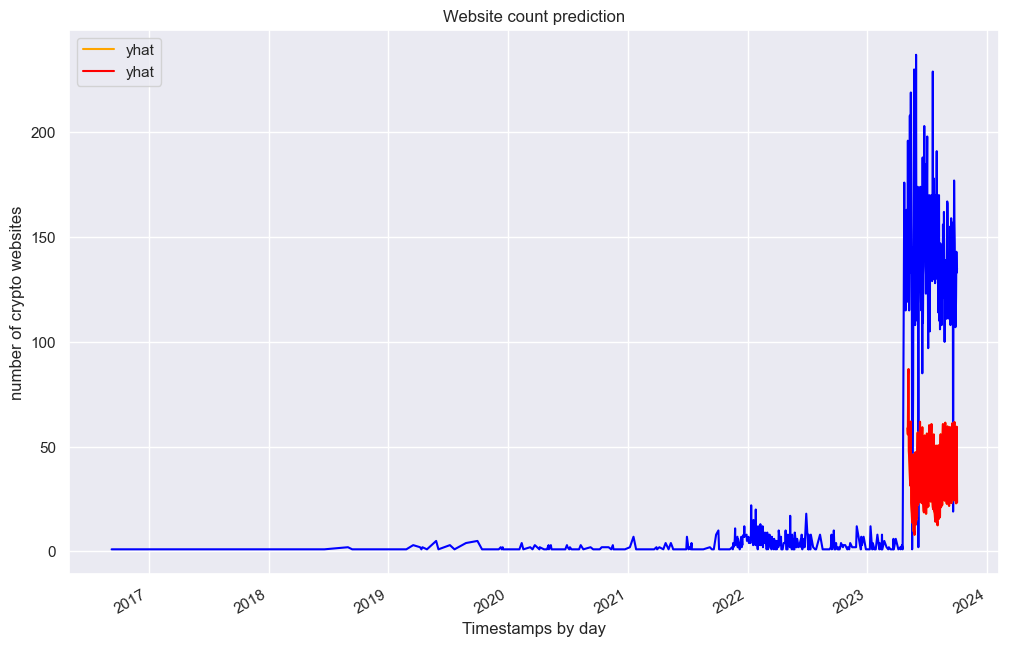

In [60]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,8)})

ax = MERGE.set_index('ds')['y'].plot(color='blue', figsize=(12,8))   #original data - -> df

forecast[['ds','yhat']].set_index('ds').head(len(train_data)).plot(ax=ax, color='orange')    #predictions on known data points --> ts
forecast[['ds','yhat']].set_index('ds').tail(len(test_data)).plot(ax=ax, color='red')  #prediction on future periods --> ts_eval

ax.set(title='Website count prediction')
ax.set(xlabel='Timestamps by day', ylabel='number of crypto websites')

plt.show()


In [61]:
from sklearn.metrics import mean_absolute_error

# Extract the actual values from the test set
actual_values = test_data['y'].values

# Extract the forecasted values from the forecast dataframe
forecast_values = forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data))['yhat'].values

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast_values)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 110.28018703687


### TIMESERIES MODEL 1.2 TEST (PRE-PROCESSED)

In [62]:
DATALAKE_DF1 = DATALAKE_DF.copy()

In [63]:
DATALAKE_DF1

,Website,Created Date
0,noticrypto.website,2023/04/23
1,learntobuybitcoins.com,2023/04/23
2,bitcoiningeneva.com,2023/04/23
3,cryptobrainfeed.com,2023/04/23
4,crazyzcrypto.club,2023/04/23
...,...,...
32154,blockchaining.site,2023/11/28
32155,rocketcrypto.info,2023/11/28
32156,raidonsolana.com,2023/11/28
32157,cryptobillee.com,2023/11/28


In [64]:
DATALAKE_DF1['Created Date'] = pd.to_datetime(DATALAKE_DF1['Created Date'])

DATALAKE_DF1 = DATALAKE_DF1.drop_duplicates(subset=['Created Date', 'Website'])
DATALAKE_DF1

,Website,Created Date
0,noticrypto.website,2023-04-23
1,learntobuybitcoins.com,2023-04-23
2,bitcoiningeneva.com,2023-04-23
3,cryptobrainfeed.com,2023-04-23
4,crazyzcrypto.club,2023-04-23
...,...,...
32154,blockchaining.site,2023-11-28
32155,rocketcrypto.info,2023-11-28
32156,raidonsolana.com,2023-11-28
32157,cryptobillee.com,2023-11-28


In [65]:
DATALAKE_DF1

,Website,Created Date
0,noticrypto.website,2023-04-23
1,learntobuybitcoins.com,2023-04-23
2,bitcoiningeneva.com,2023-04-23
3,cryptobrainfeed.com,2023-04-23
4,crazyzcrypto.club,2023-04-23
...,...,...
32154,blockchaining.site,2023-11-28
32155,rocketcrypto.info,2023-11-28
32156,raidonsolana.com,2023-11-28
32157,cryptobillee.com,2023-11-28


In [66]:
DATALAKE_DF1['website_count'] = DATALAKE_DF1.groupby(['Created Date', 'Website'])['Website'].transform('count')
DATALAKE_DF1['website_count']

C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\2637115388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATALAKE_DF1['website_count'] = DATALAKE_DF1.groupby(['Created Date', 'Website'])['Website'].transform('count')


0        1
1        1
2        1
3        1
4        1
        ..
32154    1
32155    1
32156    1
32157    1
32158    1
Name: website_count, Length: 31211, dtype: int64

In [67]:
DATALAKE_DF1['website_count'] = DATALAKE_DF1.groupby(DATALAKE_DF1['Created Date'].dt.date)['website_count'].transform('sum')


C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\4054158899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATALAKE_DF1['website_count'] = DATALAKE_DF1.groupby(DATALAKE_DF1['Created Date'].dt.date)['website_count'].transform('sum')


In [68]:
DATALAKE_DF1 = DATALAKE_DF1.drop_duplicates(subset=['Created Date', 'website_count'])
DATALAKE_DF1

,Website,Created Date,website_count
0,noticrypto.website,2023-04-23,144
144,cryptobuddy.net,2023-04-24,180
324,wovcacrypto.space,2023-04-25,144
468,bitcoinlucroapp.net,2023-04-26,141
609,cryptothrashers.xyz,2023-04-27,141
...,...,...,...
31408,killingcrypto.com,2023-11-24,133
31541,cryptowin.site,2023-11-25,157
31698,cryptoinsured.net,2023-11-26,142
31840,crypto-barter-hub.com,2023-11-27,169


<Axes: xlabel='Created Date'>

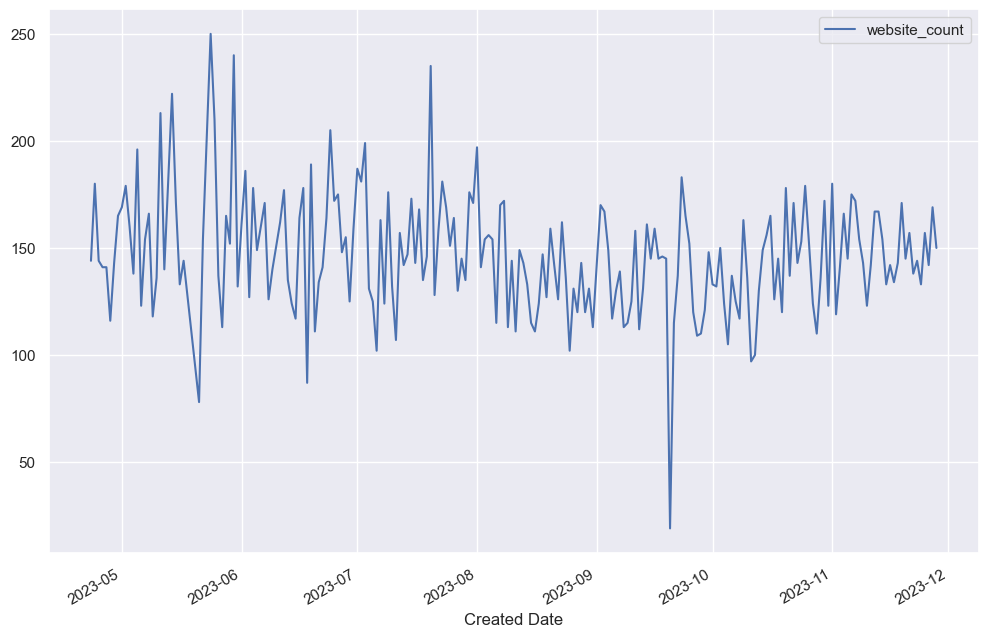

In [69]:
DATALAKE_DF1 = DATALAKE_DF1.set_index('Created Date')
DATALAKE_DF1.plot()

In [70]:
DATALAKE_DF1 = DATALAKE_DF1.reset_index()


<Axes: xlabel='Timecolumn', ylabel='Number of crypto websites'>

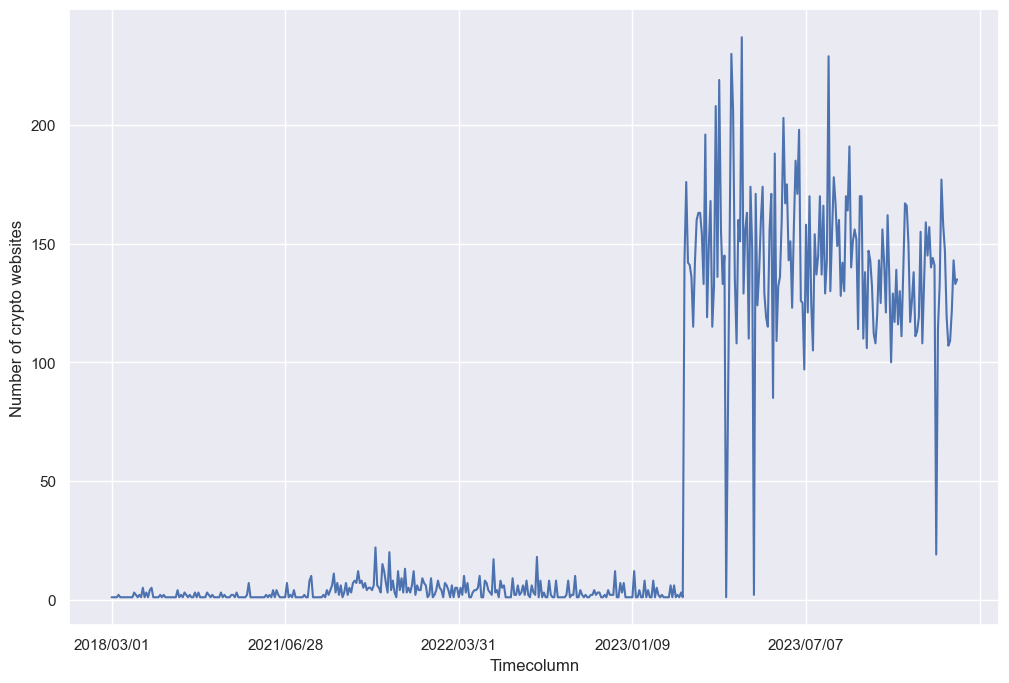

In [71]:
Merge_no_outliers.website_count.plot(ylabel = 'Number of crypto websites')

##### RESAMPLING

In [72]:
#DOWNSAMPLE TO REDUCE NOISE OF DATA

Merge_no_outliers.index = pd.to_datetime(Merge_no_outliers.index)
Merge_no_outliers =  Merge_no_outliers.asfreq('D') # Adjust the frequency as per your data

# Downsample to weekly and aggregate using mean (you can use other aggregation methods)
weekly_dataset = Merge_no_outliers.resample('W').mean()

# If you want to reset the index and have 'ds' as a column again:
weekly_dataset.reset_index(inplace=True)

# Print or further process the downsampled DataFrame
print(weekly_dataset.head())

  Timecolumn  website_count  BITCOIN PRICE  TETHER PRICE  Open_Bitcoin  \
0 2018-03-04            1.0   11018.700195      1.000075  10681.200195   
1 2018-03-11            NaN            NaN           NaN           NaN   
2 2018-03-18            NaN            NaN           NaN           NaN   
3 2018-03-25            NaN            NaN           NaN           NaN   
4 2018-04-01            NaN            NaN           NaN           NaN   

   high_Bitcoin   low_Bitcoin  volume_bitcoin  market_Bitcoin  Open_Tether  \
0  11120.649902  10601.399902    7.468935e+09    1.861644e+11     0.999018   
1           NaN           NaN             NaN             NaN          NaN   
2           NaN           NaN             NaN             NaN          NaN   
3           NaN           NaN             NaN             NaN          NaN   
4           NaN           NaN             NaN             NaN          NaN   

   high_Tether  low_Tether  volume_tether  market_Tether  \
0      1.00539    0.995059

In [73]:
weekly_dataset = weekly_dataset.dropna()
weekly_dataset = weekly_dataset.set_index('Timecolumn')

<Axes: xlabel='Timecolumn'>

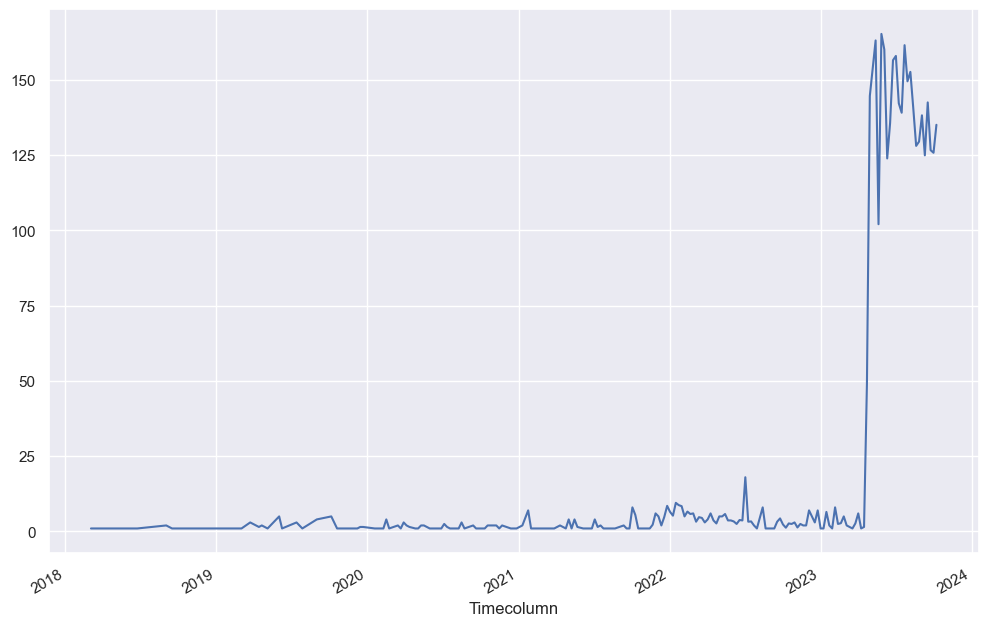

In [74]:
weekly_dataset.website_count.plot()

In [75]:
#RESET COLUMN TO FILTER DATASET TO 2022 UPWARDS
weekly_dataset = weekly_dataset.reset_index()
TIMESERIES_DF = weekly_dataset[weekly_dataset['Timecolumn'] >= '2018-01-01']

##### STATIONARITY 

In [76]:
len(TIMESERIES_DF)

190

In [77]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(TIMESERIES_DF['website_count'], autolag='AIC')

# Print the test statistics
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Check the p-value to determine stationarity
if result[1] <= 0.05:
    print("Reject the null hypothesis. The time series is likely stationary.")
else:
    print("Fail to reject the null hypothesis. The time series is likely non-stationary.")

ADF Statistic: -0.35408801801146966
p-value: 0.9174868387021206
Critical Values: {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}
Fail to reject the null hypothesis. The time series is likely non-stationary.


##### BUILD MODEL

In [78]:
TIMESERIES_DF = TIMESERIES_DF.reset_index()
TIMESERIES_DF.rename(columns={"Timecolumn": "ds", "website_count": "y"}, inplace = True)
split_date1 = '2023-05-01'
train_data1 = TIMESERIES_DF[TIMESERIES_DF['ds'] < split_date1]
test_data1 = TIMESERIES_DF[TIMESERIES_DF['ds'] > split_date1]

model = Prophet(growth="linear", weekly_seasonality=7, yearly_seasonality=6)

model.fit(train_data1)

future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test_data1))
forecast[['ds','yhat']].set_index('ds').tail(len(test_data1))

19:33:02 - cmdstanpy - INFO - Chain [1] start processing
19:33:03 - cmdstanpy - INFO - Chain [1] done processing


,yhat
ds,
2024-04-07,12.095493
2024-04-08,15.691093
2024-04-09,16.298877
2024-04-10,16.908925
2024-04-11,17.517293
2024-04-12,18.119999
2024-04-13,18.713061
2024-04-14,16.298576
2024-04-15,19.854501


19:33:03 - cmdstanpy - INFO - Chain [1] start processing
19:33:03 - cmdstanpy - INFO - Chain [1] done processing


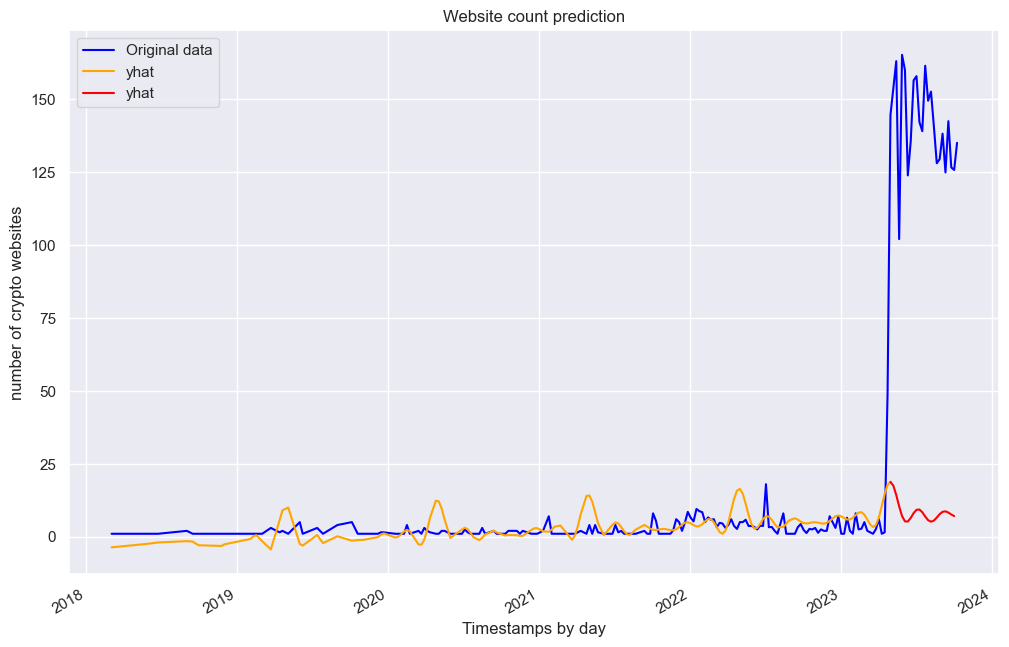

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Define the split date
split_date1 = '2023-05-01'

# Split the data into training and test sets
train_data1 = TIMESERIES_DF[TIMESERIES_DF['ds'] < split_date1]
test_data1 = TIMESERIES_DF[TIMESERIES_DF['ds'] > split_date1]

# Fit the model on the training data
model = Prophet(growth="linear", weekly_seasonality=7, yearly_seasonality=6)
model.fit(train_data1)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=22, freq='W')

# Generate the forecast
forecast = model.predict(future)

# Plotting
sns.set(rc={'figure.figsize':(12,8)})
ax = TIMESERIES_DF.set_index('ds')['y'].plot(color='blue', label='Original data', figsize=(12,8))

# Plot predictions on known data points (training set)
forecast[['ds', 'yhat']].set_index('ds').head(len(train_data1)).plot(ax=ax, color='orange', label='Training Set Predictions')

# Plot predictions on future periods (test set)
forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data1)).plot(ax=ax, color='red', label='Test Set Predictions')

ax.set(title='Website count prediction')
ax.set(xlabel='Timestamps by day', ylabel='number of crypto websites')
ax.legend()  # Show legend

plt.show()


##### EVALUATION METRIC

In [80]:
from sklearn.metrics import mean_absolute_error

# Extract the actual values from the test set
actual_values = test_data1['y'].values

# Extract the forecasted values from the forecast dataframe
forecast_values = forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data1))['yhat'].values

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast_values)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 132.84314768779518


##### TIMESERIES MODEL 3 PRE_OUTLIER

##### BUILD MODEL

In [81]:
DATALAKE_DF1

,Created Date,Website,website_count
0,2023-04-23,noticrypto.website,144
1,2023-04-24,cryptobuddy.net,180
2,2023-04-25,wovcacrypto.space,144
3,2023-04-26,bitcoinlucroapp.net,141
4,2023-04-27,cryptothrashers.xyz,141
...,...,...,...
208,2023-11-24,killingcrypto.com,133
209,2023-11-25,cryptowin.site,157
210,2023-11-26,cryptoinsured.net,142
211,2023-11-27,crypto-barter-hub.com,169


In [82]:
TIMESERIES_DF1 = weekly_dataset[weekly_dataset['Timecolumn'] < '2023-04-01']

In [83]:
#TIMESERIES_DF1 = TIMESERIES_DF1.reset_index()
TIMESERIES_DF1.rename(columns={"Timecolumn": "ds", "website_count": "y"}, inplace = True)
split_date2 = '2023-01-02'
train_data2 = TIMESERIES_DF1[TIMESERIES_DF1['ds'] < split_date2]
test_data2 = TIMESERIES_DF1[TIMESERIES_DF1['ds'] > split_date2]

model = Prophet(growth="linear", weekly_seasonality=7, yearly_seasonality=6)

model.fit(train_data2)

future = model.make_future_dataframe(periods=11, freq='W')

# Generate the forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test_data2))
forecast[['ds','yhat']].set_index('ds').tail(len(test_data2))

C:\Users\ONnodum\AppData\Local\Temp\ipykernel_5680\2089298733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TIMESERIES_DF1.rename(columns={"Timecolumn": "ds", "website_count": "y"}, inplace = True)
19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing


,yhat
ds,
2023-01-01,5.409123
2023-01-08,5.671239
2023-01-15,5.788382
2023-01-22,5.747812
2023-01-29,5.568621
2023-02-05,5.296695
2023-02-12,4.991237
2023-02-19,4.708365
2023-02-26,4.487953


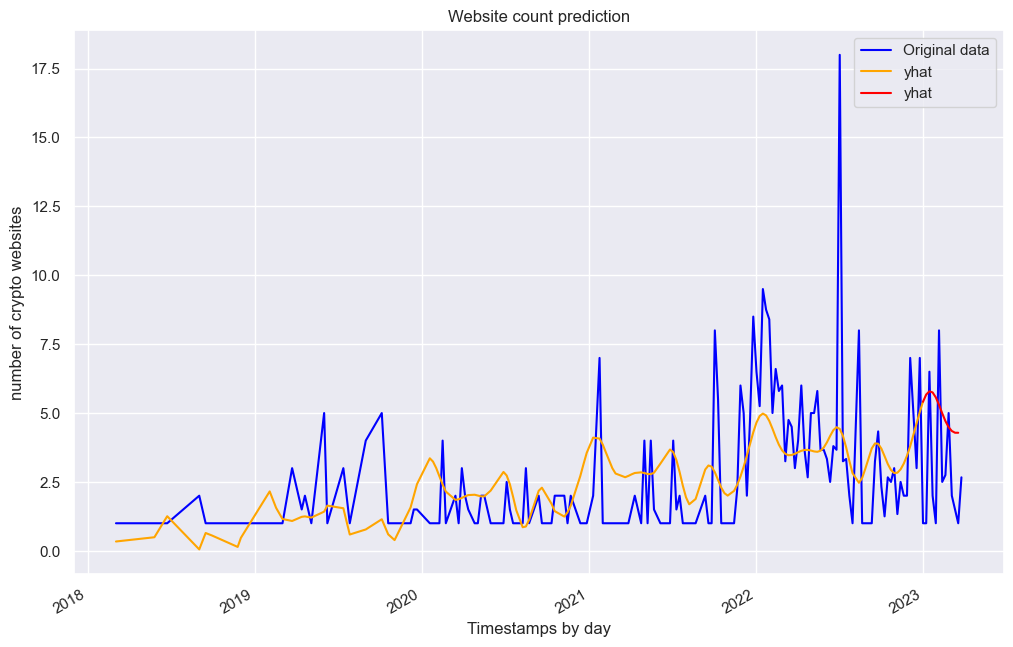

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline





# Plotting
sns.set(rc={'figure.figsize':(12,8)})
ax = TIMESERIES_DF1.set_index('ds')['y'].plot(color='blue', label='Original data', figsize=(12,8))

# Plot predictions on known data points (training set)
forecast[['ds', 'yhat']].set_index('ds').head(len(train_data2)).plot(ax=ax, color='orange', label='Training Set Predictions')

# Plot predictions on future periods (test set)
forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data2)).plot(ax=ax, color='red', label='Test Set Predictions')

ax.set(title='Website count prediction')
ax.set(xlabel='Timestamps by day', ylabel='number of crypto websites')
ax.legend()  # Show legend

plt.show()

##### EVALUATION METRIC

In [85]:
from sklearn.metrics import mean_absolute_error

# Extract the actual values from the test set
actual_values = test_data2['y'].values

# Extract the forecasted values from the forecast dataframe
forecast_values = forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data2))['yhat'].values

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast_values)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 2.6478052529690204


#### MODEL POST SPIKE

In [86]:
TIMESERIES_DF2 = DATALAKE_DF1


In [87]:
TIMESERIES_DF2.rename(columns={"Created Date": "ds", "website_count": "y"}, inplace = True)
split_date2 = '2023-10-20'
train_data2 = TIMESERIES_DF2[TIMESERIES_DF2['ds'] < split_date2]
test_data2 = TIMESERIES_DF2[TIMESERIES_DF2['ds'] > split_date2]

model = Prophet(growth="linear", weekly_seasonality=7, yearly_seasonality=6)

model.fit(train_data2)

future = model.make_future_dataframe(periods=11, freq='W')

# Generate the forecast
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(len(test_data2))
forecast[['ds','yhat']].set_index('ds').tail(len(test_data2))


19:33:04 - cmdstanpy - INFO - Chain [1] start processing
19:33:04 - cmdstanpy - INFO - Chain [1] done processing


,yhat
ds,
2023-09-22,129.651798
2023-09-23,136.718820
2023-09-24,137.341523
2023-09-25,146.799557
2023-09-26,127.503577
2023-09-27,122.619151
2023-09-28,126.780272
2023-09-29,128.980969
2023-09-30,136.055584


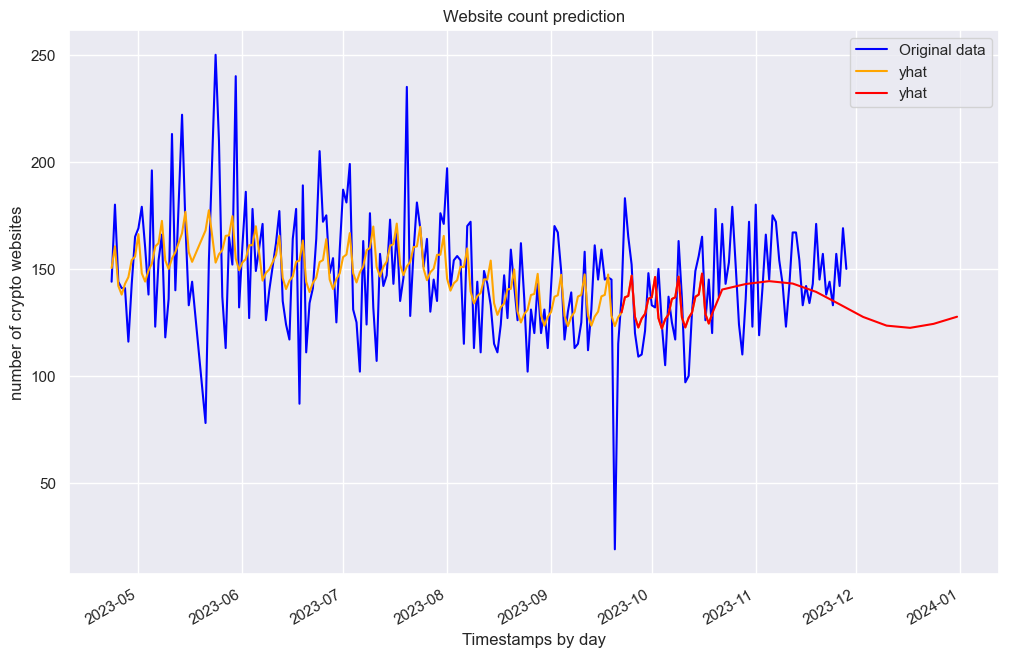

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline





# Plotting
sns.set(rc={'figure.figsize':(12,8)})
ax = TIMESERIES_DF2.set_index('ds')['y'].plot(color='blue', label='Original data', figsize=(12,8))

# Plot predictions on known data points (training set)
forecast[['ds', 'yhat']].set_index('ds').head(len(train_data2)).plot(ax=ax, color='orange', label='Training Set Predictions')

# Plot predictions on future periods (test set)
forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data2)).plot(ax=ax, color='red', label='Test Set Predictions')

ax.set(title='Website count prediction')
ax.set(xlabel='Timestamps by day', ylabel='number of crypto websites')
ax.legend()  # Show legend

plt.show()

In [89]:
from sklearn.metrics import mean_absolute_error

# Extract the actual values from the test set
actual_values = test_data2['y'].values

# Extract the forecasted values from the forecast dataframe
forecast_values = forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data2))['yhat'].values

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast_values)

# Print the MAE
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 18.817510354582048


In [99]:
# Assuming you have the 'test_data2' DataFrame and the 'forecast' DataFrame from your existing code

# Extracting relevant columns from the forecast DataFrame
forecast_subset = forecast[['ds', 'yhat']].set_index('ds').tail(len(test_data2))

# Merging the actual data and predicted data into a new DataFrame
comparison_df = pd.merge(test_data2[['ds', 'y']], forecast_subset, left_on='ds', right_index=True)

# Renaming columns for clarity
comparison_df.rename(columns={'y': 'Actual', 'yhat': 'Predicted'}, inplace=True)

# Displaying the DataFrame
comparison_df


,ds,Actual,Predicted
175,2023-10-22,171,140.341693
182,2023-10-29,136,142.922185
189,2023-11-05,145,144.259928
196,2023-11-12,167,143.137121
203,2023-11-19,171,139.237891
210,2023-11-26,142,133.443501


##### BUILD MODEL

#### Stationarity Test

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_bitcoin_price = scaler.fit_transform(MERGE['BITCOIN PRICE'].values.reshape(-1, 1))
scaled_website_count = scaler.fit_transform(MERGE['y'].values.reshape(-1, 1))

# Creating a new DataFrame with the scaled values
scaled_dataset = pd.DataFrame({'date': MERGE['ds'],
                               'scaled_bitcoin_price': scaled_bitcoin_price.flatten(),
                               'scaled_website_count': scaled_website_count.flatten()})

# Plotting the line chart with scaled values
plt.figure(figsize=(10, 6))

# Plotting scaled Bitcoin price
plt.plot(scaled_dataset['date'], scaled_dataset['scaled_bitcoin_price'], label='Scaled Bitcoin Price', marker='o')

# Plotting scaled number of websites on the same plot
plt.plot(scaled_dataset['date'], scaled_dataset['scaled_website_count'], label='Scaled Number of Websites', marker='o', linestyle='-')

# Adding labels to the axes
plt.xlabel('Date')
plt.ylabel('Scaled Values')

# Adding a legend to differentiate between scaled Bitcoin price and scaled number of websites
plt.legend()

# Adding a title to the plot if needed
plt.title('Scaled Bitcoin Price and Scaled Number of Websites Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##### ARIMA MODEL (FILTERED_DATASET)

In [ ]:
# Assuming TIMESERIES_DF1 contains your time series data
# Replace 'y' with the actual column name in your DataFrame
split_date2 = '2023-01-02'

# Reset the index
TIMESERIES_DF1 = TIMESERIES_DF1.reset_index()

# Split the data into training and test sets
train_data1 = TIMESERIES_DF1[TIMESERIES_DF1['ds'] < split_date2]
test_data1 = TIMESERIES_DF1[TIMESERIES_DF1['ds'] >= split_date2]

In [ ]:
TIMESERIES_DF1

In [ ]:




# Set the index back for proper plotting
TIMESERIES_DF1 = TIMESERIES_DF1.set_index('ds')
train_data1 = train_data1.set_index('ds')
test_data1 = test_data1.set_index('ds')

# Fit auto_arima model
model = auto_arima(y=train_data1['y'], m=8)

# Generate predictions
predictions = pd.Series(model.predict(n_periods=len(test_data1)))

# Plotting
plt.figure(figsize=(12, 8))
train_data1['y'].plot(legend=True, label='Train')
test_data1['y'].plot(legend=True, label='Test')
predictions.plot(legend=True, label='Predictions')
plt.title('Auto ARIMA Forecast vs. Actual Data')
plt.xlabel('Timestamps by day')
plt.ylabel('Number of Crypto Websites')
plt.legend()
plt.show()



In [ ]:
len(train_data1)

In [ ]:

s_dec = seasonal_decompose(TEST_MERGE_MASK.y)